# Project Overview

Step 1: Simulate/Load customer data
   - Columns: customer_id, age, gender, region, tenure, call_minutes, sms_count, data_usage_gb, recharge_amount

Step 2: Data Cleaning & Feature Engineering
   - Handle missing values
   - Create derived features: avg_monthly_spend, usage_ratio, peak_hour_usage

Step 3: Exploratory Data Analysis (EDA)
   - Visualize distributions of usage, recharge amounts
   - Detect patterns: top 10% data users, high SMS users
   - Heatmaps, boxplots, trend analysis

Step 4: Customer Segmentation (Clustering)
   - K-Means or DBSCAN to segment users
   - Identify: heavy users, average users, low usage, potential churners

Step 5: Predictive Modeling
   - Predict likely high-spend or at-risk customers
   - ML models: Random Forest / Gradient Boosting

Step 6: Real-Time Simulation
   - Feed new transactions or usage logs
   - Predict plan upgrades, high-data usage, or potential churn

Step 7: Dashboard/Visualization
   - ipywidgets dashboard for customer segments, alerts, trends


# Import required Library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import display, clear_output
import plotly.express as px
import ipywidgets as widgets
import time

# -----------------------------
# Step 1: Simulate Customer Data
# -----------------------------

In [7]:
np.random.seed(42)
n_customers = 1000

data = {
    'customer_id': range(1, n_customers+1),
    'age': np.random.randint(18, 70, n_customers),
    'gender': np.random.choice(['Male', 'Female'], n_customers),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_customers),
    'tenure': np.random.randint(1, 60, n_customers),
    'call_minutes': np.random.randint(50, 2000, n_customers),
    'sms_count': np.random.randint(0, 500, n_customers),
    'data_usage_gb': np.random.uniform(0.1, 50, n_customers),
    'recharge_amount': np.random.uniform(100, 2000, n_customers)
}
df = pd.DataFrame(data)

In [8]:
df.head()

,customer_id,age,gender,region,tenure,call_minutes,sms_count,data_usage_gb,recharge_amount
0,1,56,Male,North,28,1474,460,26.009306,1433.302720
1,2,69,Male,South,51,600,134,30.426859,1157.282811
2,3,46,Male,West,40,442,227,12.343080,781.381006
3,4,32,Female,North,54,1940,110,2.980835,1831.544461
4,5,60,Male,West,5,1837,306,19.612540,139.774824


# -----------------------------
# Step 2: Feature Engineering
# -----------------------------

In [9]:

df['avg_monthly_spend'] = df['recharge_amount'] / df['tenure']
df['usage_ratio'] = df['data_usage_gb'] / (df['call_minutes'] + 1)
df['high_data_user'] = (df['data_usage_gb'] > 20).astype(int)


In [10]:
df.head()

,customer_id,age,gender,region,tenure,call_minutes,sms_count,data_usage_gb,recharge_amount,avg_monthly_spend,usage_ratio,high_data_user
0,1,56,Male,North,28,1474,460,26.009306,1433.302720,51.189383,0.017633,1
1,2,69,Male,South,51,600,134,30.426859,1157.282811,22.691820,0.050627,1
2,3,46,Male,West,40,442,227,12.343080,781.381006,19.534525,0.027862,0
3,4,32,Female,North,54,1940,110,2.980835,1831.544461,33.917490,0.001536,0
4,5,60,Male,West,5,1837,306,19.612540,139.774824,27.954965,0.010671,0


# -----------------------------
# Step 3: Exploratory Data Analysis
# -----------------------------

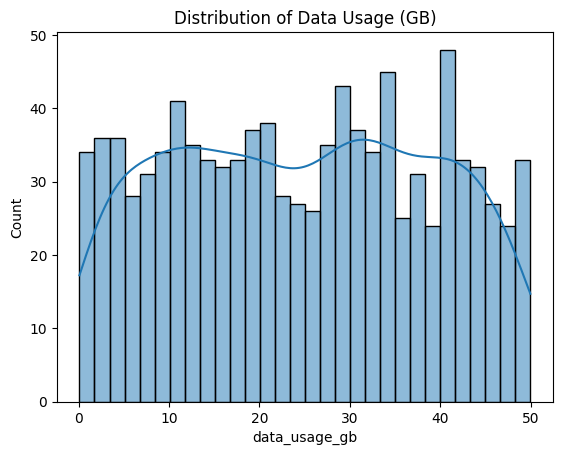

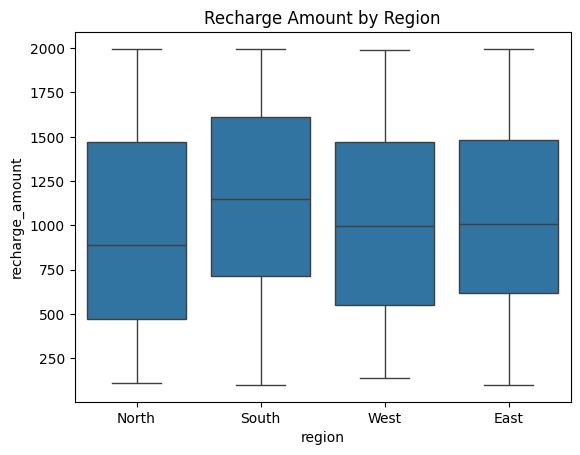

In [11]:

sns.histplot(df['data_usage_gb'], bins=30, kde=True)
plt.title('Distribution of Data Usage (GB)')
plt.show()

sns.boxplot(x='region', y='recharge_amount', data=df)
plt.title('Recharge Amount by Region')
plt.show()


# -----------------------------
# Step 4: Customer Segmentation (Clustering)
# -----------------------------

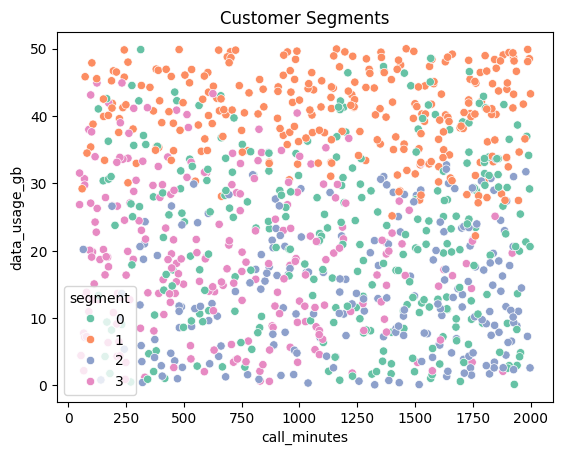

In [35]:
# Picks the columns we want to use for clustering.
# These are the numerical features representing customer usage and spending.
features = df[['call_minutes', 'sms_count', 'data_usage_gb', 'recharge_amount']]
# StandardScaler normalizes data so all features have mean = 0 and std = 1.
# Why? Clustering algorithms like KMeans are sensitive to scale, so big numbers (like call_minutes) don’t dominate small ones (like SMS count).
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# n_clusters=4 → we want 4 customer segments.
# fit_predict → fits the KMeans model and assigns each customer to a cluster.
# Adds a new column segment to df indicating which cluster each customer belongs to (0,1,2,3).
kmeans = KMeans(n_clusters=4, random_state=42)
df['segment'] = kmeans.fit_predict(features_scaled)
# Plots call_minutes vs data_usage_gb.
# Points are colored by cluster (segment).
# Helps visually see how the 4 customer segments differ in usage patterns.
sns.scatterplot(x='call_minutes', y='data_usage_gb', hue='segment', data=df, palette='Set2')
plt.title('Customer Segments')
plt.show()


# -----------------------------
# Step 5: Predictive Modeling
# Predict High Data Users based on other features
# -----------------------------

In [36]:

X = df[['age', 'tenure', 'call_minutes', 'sms_count', 'recharge_amount']]
y = df['high_data_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Classification Report for High Data Users:")
print(classification_report(y_test, y_pred))


Classification Report for High Data Users:
              precision    recall  f1-score   support

           0       0.42      0.23      0.29        88
           1       0.55      0.75      0.64       112

    accuracy                           0.52       200
   macro avg       0.48      0.49      0.47       200
weighted avg       0.49      0.52      0.49       200



# -----------------------------
# Step 6: Real-Time Simulation
# -----------------------------

In [42]:
print("\nSimulated Real-Time Transactions:")
for i in range(5):
    #We simulate 5 “new” customers from the test dataset (X_test).
    new_customer = X_test.iloc[i].values.reshape(1, -1)
    #X_test.iloc[i] → selects the i-th row (customer) from the test set.
    #.values.reshape(1, -1) → reshapes it to 2D array, which is required by the model for prediction.
    pred = rf_model.predict(new_customer)
    #Uses the trained Random Forest model to predict whether this customer is a high data user (1) or not (0).
    print(f"Customer {i+1}: {'High Data User' if pred[0]==1 else 'Regular User'}")
    # pred[0]==1 → High Data User
    # pred[0]==0 → Regular User


Simulated Real-Time Transactions:
Customer 1: High Data User
Customer 2: High Data User
Customer 3: High Data User
Customer 4: Regular User
Customer 5: High Data User


# -----------------------------
# Step 7: ipywidgets Dashboard
# -----------------------------

In [45]:
print("\nInteractive Dashboard:")

# Creates a dropdown menu in Jupyter to filter customers by region.
# Options: All + unique regions (North, South, East, West).
# Default value: All.
# display(region_dropdown) → shows the dropdown in the notebook.
region_dropdown = widgets.Dropdown(
options=['All'] + list(df['region'].unique()),
value='All',
description='Region:'
)
display(region_dropdown)

# Creates a container to display plots and tables dynamically.
# Anything printed inside with output: will appear here.
output = widgets.Output()
display(output)

# Function called whenever the dropdown selection changes.
# clear_output(wait=True) → clears previous plots so the dashboard updates cleanly.
def update_dashboard(change):
    with output:
        clear_output(wait=True)
        # If All is selected → use full dataset.
        # Otherwise → filter dataset by the selected region.
        if change['new'] == 'All':
            filtered_df = df
        else:
            filtered_df = df[df['region'] == change['new']]
        print(f"Showing {len(filtered_df)} customers")
        # Segment counts bar chart
        #Shows how many customers are in each segment using a colorful bar chart.
        seg_counts = filtered_df['segment'].value_counts().sort_index()
        fig1 = px.bar(x=seg_counts.index, y=seg_counts.values, color=seg_counts.values,
        color_continuous_scale=px.colors.sequential.Viridis,
        labels={'x':'Segment','y':'Count','color':'Count'},
        title='Customer Segments')
        fig1.show()
        # High Data Users Pie Chart
        #Shows proportion of regular vs high-data users as a pie chart.
        high_data_counts = filtered_df['high_data_user'].value_counts()
        fig2 = px.pie(values=high_data_counts.values, names=['Regular','High Data User'],
        color_discrete_sequence=px.colors.sequential.Plasma,
        title='High Data Users Distribution')
        fig2.show()
        # Scatter plot: Call Minutes vs Data Usage
        # Each point = a customer
        # Color = cluster segment
        # Size = average monthly spend
        # Symbol = gender
        fig3 = px.scatter(filtered_df, x='call_minutes', y='data_usage_gb', color='segment', size='avg_monthly_spend',
        color_continuous_scale=px.colors.sequential.Plasma, symbol='gender',
        title='Call Minutes vs Data Usage')
        fig3.show()
        # Display top 5 customers by recharge
        #Shows table of top 5 customers who spend the most on recharge.
        display(filtered_df[['customer_id','region','call_minutes','data_usage_gb','recharge_amount','high_data_user']]
        .sort_values(by='recharge_amount', ascending=False).head())

#Whenever the dropdown value changes, the dashboard updates automatically.
region_dropdown.observe(update_dashboard, names='value')


# Initialize dashboard
#Displays the initial dashboard with all regions selected.
update_dashboard({'new': 'All'})


Interactive Dashboard:


Dropdown(description='Region:', options=('All', 'North', 'South', 'West', 'East'), value='All')

Output()